In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
import datetime

### Combine dataframes and generate combined.h5 file

df2017 = pd.read_csv(r'connection_2017.csv',delimiter=';')
df2018 = pd.read_csv(r'connection_2018.csv',delimiter=';')
df2019 = pd.read_csv(r'connection_2019.csv',delimiter=';')
frames = [df2017, df2018, df2019]
df = pd.concat(frames)
df.head()
df.to_hdf(r'combined.h5', key = 'df', mode = 'w', format = 'fixed', encoding = 'utf-8')


import gc
del_df = [df2017,df2018, df2019, df]
del df2017,df2018, df2019, df
del del_df
gc.collect()

In [3]:
df = pd.read_hdf('combined.h5', 'df')
df.head()

,EVENT_C,CNTR_STATUS_C,DISC_PORT1_C,LOAD_PORT_C,ABBR_VESSEL_M1,BTR1,ATD1,ATU1,LINE_C1_GROUP,SERVICE_C1,...,LINE_C2_GROUP,SERVICE_C2,SERVICE_TYPE_DESC_X2,DIRECTION_C2,CONSORTIUM_C2,CAPACITY2,DERIVED_CNTR_PURP_C,OPR_GROUP_C,SUMOFBOX_Q,SUMOFTEU_Q
0,DISC,F,NLRTM,VNPHG,V10343,2017/03/22 18:44:00,2017/03/22 19:19:00,2017/03/23 7:01:00,L389,S7569,...,L391,S7434,NaN,W,C5100,10100.0,TSHIP,O413,1,2.0
1,LOAD,F,INKAT,CNNGB,V12377,2017/05/12 23:24:00,2017/05/13 0:09:00,2017/05/14 4:03:00,L381,S7389,...,L341,S7340,INTRA-ASIA EXTENDED,W,C5183,5610.0,TSHIP,O531,9,18.0
2,DISC,F,HRRJK,MYTPP,V11752,2017/09/24 11:48:00,2017/09/24 12:08:00,2017/09/24 22:28:00,L349,S7388,...,L344,S7634,EFE/MEDITTERANEAN,W,C5113,6350.0,TSHIP,O536,2,2.0
3,DISC,F,CAVA3,IDBLW,V10082,2017/05/21 0:39:00,2017/05/21 1:02:00,2017/05/21 15:52:00,L376,S7439,...,L391,S7462,TRANS-PACIFIC,E,C5059,6238.0,TSHIP,O489,9,9.0
4,LOAD,F,SAJED,VNSGN,V10397,2017/05/27 7:54:00,2017/05/28 5:31:00,2017/05/28 23:51:00,L352,S7639,...,L341,S7349,INTRA-ASIA,W,NaN,1315.0,TSHIP,O409,2,4.0


In [4]:
df['ATD1'] = pd.to_datetime(df['ATD1'])
df.sort_values(by = 'ATD1', inplace = True)
#df.set_index('ATD1', inplace=True)


In [36]:
date_time_str1 = '2019-07-01 00:00:00'
date_time_obj1 = datetime.datetime.strptime(date_time_str1, '%Y-%m-%d %H:%M:%S')
date_time_str2 = '2017-01-01 00:00:00'
date_time_obj2 = datetime.datetime.strptime(date_time_str2, '%Y-%m-%d %H:%M:%S')
train = df[(df.ATD1 < date_time_obj1) & (df.ATD1 > date_time_obj2)]
train.set_index('ATD1', inplace=True)
test = df[df.ATD1 >= date_time_obj]
test.set_index('ATD1', inplace=True)

In [37]:
print(df.shape)
print(train.shape)
print(test.shape)

(9502177, 28)
(7842739, 27)
(1659438, 27)


In [30]:
train.tail()

,EVENT_C,CNTR_STATUS_C,DISC_PORT1_C,LOAD_PORT_C,ABBR_VESSEL_M1,BTR1,ATU1,LINE_C1_GROUP,SERVICE_C1,SERVICE_TYPE_DESC_X1,...,LINE_C2_GROUP,SERVICE_C2,SERVICE_TYPE_DESC_X2,DIRECTION_C2,CONSORTIUM_C2,CAPACITY2,DERIVED_CNTR_PURP_C,OPR_GROUP_C,SUMOFBOX_Q,SUMOFTEU_Q
ATD1,,,,,,,,,,,,,,,,,,,,,
2019-06-30 23:50:00,DISC,F,GBSOU,KHKOS,V11825,2019/06/30 23:30:00,2019/07/01 7:04:00,L347,S7399,COMMON FEEDER,...,L344,S7517,EUROPE FAR EAST,W,C5113,17859.0,TSHIP,O413,8,15.0
2019-06-30 23:50:00,DISC,F,HKHKG,KHKOS,V11825,2019/06/30 23:30:00,2019/07/01 7:04:00,L347,S7399,COMMON FEEDER,...,L389,S7625,INTRA-ASIA EXTENDED,E,C5197,8063.0,TSHIP,O383,1,1.0
2019-06-30 23:50:00,DISC,F,GBSOU,KHKOS,V11825,2019/06/30 23:30:00,2019/07/01 7:04:00,L347,S7399,COMMON FEEDER,...,L344,S7517,EUROPE FAR EAST,W,C5113,17859.0,TSHIP,O388,2,4.0
2019-06-30 23:50:00,DISC,F,GBLGP,KHKOS,V11825,2019/06/30 23:30:00,2019/07/01 7:04:00,L347,S7399,COMMON FEEDER,...,L344,S7503,"NORTH-SOUTH (TO REG 50,70,82)",W,C5049,6450.0,TSHIP,O388,3,3.0
2019-06-30 23:50:00,DISC,F,MYWSP,KHKOS,V11825,2019/06/30 23:30:00,2019/07/01 7:04:00,L347,S7399,COMMON FEEDER,...,L347,S7346,COMMON FEEDER,W,NaN,1019.0,TSHIP,O383,1,2.0


In [38]:
test.head()

,EVENT_C,CNTR_STATUS_C,DISC_PORT1_C,LOAD_PORT_C,ABBR_VESSEL_M1,BTR1,ATU1,LINE_C1_GROUP,SERVICE_C1,SERVICE_TYPE_DESC_X1,...,LINE_C2_GROUP,SERVICE_C2,SERVICE_TYPE_DESC_X2,DIRECTION_C2,CONSORTIUM_C2,CAPACITY2,DERIVED_CNTR_PURP_C,OPR_GROUP_C,SUMOFBOX_Q,SUMOFTEU_Q
ATD1,,,,,,,,,,,,,,,,,,,,,
2019-07-01 00:22:00,LOAD,F,TZDAR,TWKHH,V13102,2019/07/01 0:02:00,2019/07/01 21:57:00,L402,S7410,AFRICA,...,L391,S7518,INTRA-ASIA EXTENDED,W,C5092,8411.0,TSHIP,O408,4,8.0
2019-07-01 00:22:00,LOAD,F,TZDAR,TWKHH,V13102,2019/07/01 0:02:00,2019/07/01 21:57:00,L402,S7410,AFRICA,...,L352,S7518,INTRA-ASIA EXTENDED,W,C5092,8468.0,TSHIP,O408,1,1.0
2019-07-01 00:22:00,LOAD,F,TZDAR,TWKEL,V13102,2019/07/01 0:02:00,2019/07/01 21:57:00,L402,S7410,AFRICA,...,L349,S7483,AFRICA,W,C5026,5060.0,TSHIP,O408,5,9.0
2019-07-01 00:22:00,LOAD,F,TZDAR,THSGZ,V13102,2019/07/01 0:02:00,2019/07/01 21:57:00,L402,S7410,AFRICA,...,L376,S7661,COMMON FEEDER,E,NaN,1118.0,TSHIP,O408,1,2.0
2019-07-01 00:22:00,LOAD,F,TZDAR,VNCLI,V13102,2019/07/01 0:02:00,2019/07/01 21:57:00,L402,S7410,AFRICA,...,L402,S7666,NaN,E,NaN,1550.0,TSHIP,O408,1,1.0


In [61]:
teu_2w = train['SUMOFTEU_Q'].resample('2W-SUN', closed = 'left').sum()
teu_d = train['SUMOFTEU_Q'].resample('D').sum()
teu_2w.head()

ATD1
2017-01-15    1201633.75
2017-01-29    1141786.00
2017-02-12    1188338.25
2017-02-26    1090225.00
2017-03-12    1171833.25
Freq: 2W-SUN, Name: SUMOFTEU_Q, dtype: float64

In [62]:
teu_2w.tail()

ATD1
2019-05-19    1407137.00
2019-06-02    1402380.50
2019-06-16    1364166.50
2019-06-30    1377042.50
2019-07-14     111249.25
Freq: 2W-SUN, Name: SUMOFTEU_Q, dtype: float64

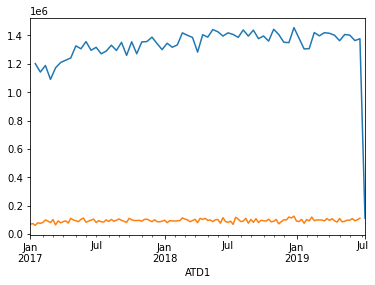

In [63]:
teu_2w.plot()
teu_d.plot()
plt.show()

In [64]:
teu_2w.drop(teu_2w.tail(1).index, inplace=True)
teu_2w.tail()

ATD1
2019-05-05    1362917.75
2019-05-19    1407137.00
2019-06-02    1402380.50
2019-06-16    1364166.50
2019-06-30    1377042.50
Freq: 2W-SUN, Name: SUMOFTEU_Q, dtype: float64

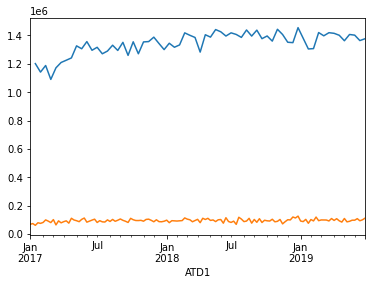

In [65]:
teu_2w.plot()
teu_d.plot()
plt.show()

## Convert to Features for RF

In [66]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df=pd.DataFrame(data)
    cols = list()

    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
    for i in range(0, n_out):
        cols.append(df.shift(-i))
    agg = pd.concat(cols, axis=1)

    if dropnan:
        agg.dropna(inplace = True)
        return agg.values

def train_test_split(data, n_test):
    return data[:-n_test, :], data[-n_test:, :]

def random_forest_forecast(train, testX):
    train = np.asarray(train)
    trainX, trainy = train[:, :-1], train[:, -1]
    model = RandomForestRegressor(n_estimators=100, n_jobs = -1)
    model.fit(trainX, trainy)
    yhat = model.predict([testX])
    return yhat

def walk_forward_validation(data, n_test):
    predictions = list()
    train, test = train_test_split(data, n_test)
    history = [x for x in train]
    for i in range(len(test)):
        testX, testy = test[i, :-1], test[i, -1]
        yhat = random_forest_forecast(history, testX)
        predictions.append(yhat)
        history.append(test[i])
        print('>expected=%.1f, predicted=%.1f'%(testy, yhat))
    error = mean_absolute_error(test[:,-1], predictions)
    return error, test[:,-1], predictions
    

>expected=1397745.0, predicted=1368531.2
>expected=1419736.5, predicted=1377842.8
>expected=1415308.0, predicted=1384645.8
>expected=1401552.2, predicted=1393685.8
>expected=1362917.8, predicted=1378224.2
>expected=1407137.0, predicted=1370742.6
>expected=1402380.5, predicted=1367446.9
>expected=1364166.5, predicted=1404580.6
>expected=1377042.5, predicted=1389123.0
MAE: 27640.583


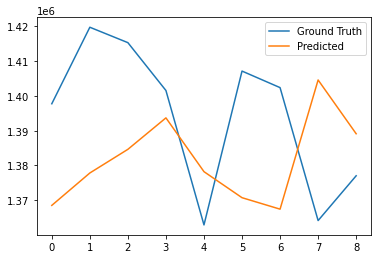

In [67]:
#2W predication
values = teu_2w.values.tolist()
#transform the time series data into supervised learning
data = series_to_supervised(values, n_in=50)
mae, y, yhat = walk_forward_validation(data, 9)
print('MAE: %.3f'%mae)
#plot expected vs predicted
plt.plot(y, label='Ground Truth')
plt.plot(yhat, label='Predicted')
plt.legend()
plt.show()

>expected=103400.8, predicted=103550.9
>expected=116321.2, predicted=102120.1
>expected=99760.0, predicted=103866.8
>expected=103007.2, predicted=99690.9
>expected=91490.2, predicted=99545.4
>expected=82647.2, predicted=97534.2
>expected=99716.8, predicted=96597.2
>expected=99889.0, predicted=105849.9
>expected=108773.8, predicted=106492.2
>expected=88839.0, predicted=99929.8
>expected=108064.2, predicted=104430.4
>expected=102183.8, predicted=98942.0
>expected=79931.5, predicted=93996.2
>expected=111249.2, predicted=97064.9
MAE: 7306.719


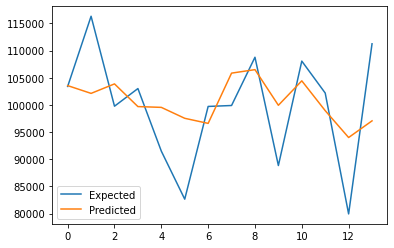

In [68]:
#Daily predication
values = teu_d.values.tolist()
#transform the time series data into supervised learning
data = series_to_supervised(values, n_in=800)
mae, y, yhat = walk_forward_validation(data, 14)
print('MAE: %.3f'%mae)
#plot expected vs predicted
plt.plot(y, label='Expected')
plt.plot(yhat, label='Predicted')
plt.legend()
plt.show()